## Create Synthetic Data to Mimic Card Fraud
Synthetic credit card fraud dataset with features that mimic real transaction patterns, including amount, transaction type, and various behavioral indicators. The dataset will be imbalanced, with only about 1% of transactions marked as fraudulent.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocess Data
Scale the features and separate the training/test sets.

In [2]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.

# Check the Distribution of the labels
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [4]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1, random_state=42)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
146884,2.054361,-0.122642,-1.245717,0.189567,0.132497,-0.620765,0.059581,-0.148058,0.338940,0.247959,...,-0.687048,0.271569,-0.497120,-0.270115,0.208619,-0.076075,-0.075428,0,-0.293579,0.038170
95597,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,...,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1,18.615944,-0.226824
96768,0.955253,-0.833374,0.847147,0.725970,-1.322868,-0.238842,-0.565347,0.022443,-0.762247,0.738315,...,-0.129397,-0.040892,0.364872,0.204756,-0.304578,0.055908,0.062489,0,1.872424,-0.220456
75511,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,-3.245109,...,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1,2.080905,-0.335930
255556,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,-3.963224,...,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,1,-0.296653,0.852830


In [5]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.0499976898594, -18.4937733551053, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.5536970096458, -18.0475965708216, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-15.5637913387301, -22.187088

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.1 s
PCA took 0.0043 s
Truncated SVD took 0.0034 s


In [7]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [8]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Train the Anomaly Detection Models
Since fraud is rare, train both models **only on the majority class (normal transactions).**

#### Train Isolation Forest

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.utils import resample

X_train_normal = X_train[y_train == 0]
X_train_sampled = resample(X_train_normal, n_samples=10000, random_state=42)  # Adjust sample size

iso_forest = IsolationForest(n_estimators=1000, contamination='auto', random_state=42)
iso_forest.fit(X_train_sampled)  # Train only on normal transactions

IsolationForest(n_estimators=1000, random_state=42)

#### Train One-Class SVM

In [11]:
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(kernel="rbf", gamma="scale", nu=0.001)  # nu controls the fraction of outliers
oc_svm.fit(X_train_sampled)  # Train only on normal transactions

OneClassSVM(nu=0.001)

## Generate Anomaly Scores
Both models produce anomaly scores, which we normalize for consistency.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score

# Get anomaly scores (-1 = anomaly, 1 = normal)
iso_scores = iso_forest.decision_function(X_test)  # Higher = more normal
ocsvm_scores = oc_svm.decision_function(X_test)   # Higher = more normal

# Normalize scores to 0-1 range
iso_scores = (iso_scores - iso_scores.min()) / (iso_scores.max() - iso_scores.min())
ocsvm_scores = (ocsvm_scores - ocsvm_scores.min()) / (ocsvm_scores.max() - ocsvm_scores.min())

# Train logistic regression to combine model scores
log_reg = LogisticRegression(random_state=42)
log_reg.fit((ocsvm_scores).reshape(-1,1), y_test)  # Use both scores as features

training_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Classifier:", log_reg.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

# Predict new anomaly scores
final_scores = log_reg.predict_proba(ocsvm_scores.reshape(-1,1))[:, 1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, final_scores)

# Find the best threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)  # Avoid divide by zero
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert to predictions (lower scores = more anomalous)
y_pred = (final_scores > best_threshold).astype(int)  # 1 = fraud, 0 = normal

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, final_scores))

Classifier: LogisticRegression has a training score of 94.0 % accuracy score
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        91
           1       0.98      0.88      0.93        99

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

ROC-AUC Score: 0.9527139527139528


## Plot Results and Find Best Threshold Value for Better Tuning

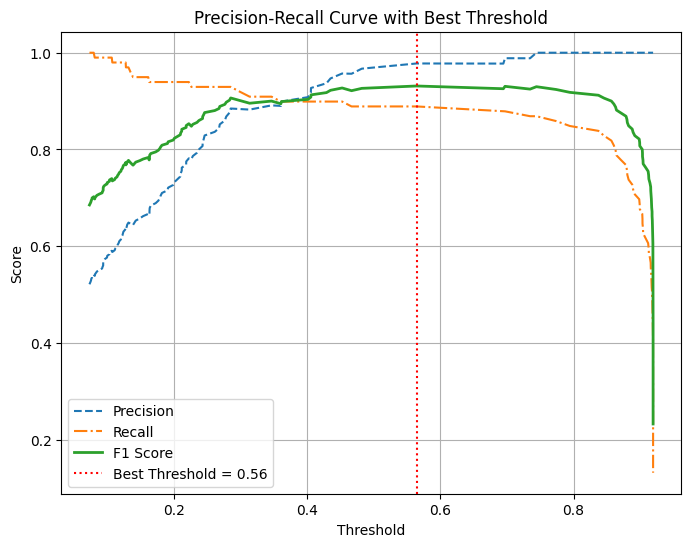

Best Threshold: 0.56


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recall[:-1], label="Recall", linestyle="-.")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", linewidth=2)
plt.axvline(best_threshold, color="red", linestyle=":", label=f"Best Threshold = {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve with Best Threshold")
plt.legend()
plt.grid()
plt.show()

print(f"Best Threshold: {best_threshold:.2f}")